In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
n = str(1) #chiller number
df = pd.read_csv("data/Chiller"+n+"_full_ext.csv")
df.index = pd.to_datetime(df['ts'])
df.drop('ts', axis=1, inplace=True)
df.head()

,ch1Watt,ch2Watt,ch3Watt,value1,value2,value3,value4,conflowRate,conflowSpeed,evaflowRate,evaflowSpeed,value
ts,,,,,,,,,,,,
2017-05-30 22:47:00,353.0,0.0,346.0,23.761293,26.677246,28.161927,28.087160,0.0,0.0,0.0,0.0,25.925078
2017-05-30 22:48:00,354.0,0.0,350.0,23.761293,26.687927,28.108521,28.129882,0.0,0.0,0.0,0.0,25.917448
2017-05-30 22:49:00,353.0,0.0,350.0,23.825380,26.687927,28.129882,28.119202,0.0,0.0,0.0,0.0,25.925078
2017-05-30 22:50:00,352.0,0.0,348.0,23.846741,26.677246,28.151246,28.108521,0.0,0.0,0.0,0.0,25.955596
2017-05-30 22:51:00,356.0,0.0,350.0,23.761293,26.655885,28.204652,28.076477,0.0,0.0,0.0,0.0,25.940337


In [3]:
df['deltaT12'] = df['value2']-df['value1']
df['deltaT34'] = df['value4']-df['value3']
df['totalWatt'] = df.apply(lambda row: row['ch1Watt']+row['ch2Watt']+row['ch3Watt'], axis=1)
df.drop(['ch1Watt', 'ch2Watt', 'ch3Watt'], inplace=True, axis=1)
df=df[['value1','value3','value','conflowRate','evaflowRate','deltaT12','deltaT34','totalWatt']]
df.columns=['value1','value3','value_ext','conflowRate','evaflowRate','deltaT12','deltaT34','totalWatt']
df.head()

,value1,value3,value_ext,conflowRate,evaflowRate,deltaT12,deltaT34,totalWatt
ts,,,,,,,,
2017-05-30 22:47:00,23.761293,28.161927,25.925078,0.0,0.0,2.915953,-0.074767,699.0
2017-05-30 22:48:00,23.761293,28.108521,25.917448,0.0,0.0,2.926633,0.021361,704.0
2017-05-30 22:49:00,23.825380,28.129882,25.925078,0.0,0.0,2.862547,-0.010681,703.0
2017-05-30 22:50:00,23.846741,28.151246,25.955596,0.0,0.0,2.830506,-0.042725,700.0
2017-05-30 22:51:00,23.761293,28.204652,25.940337,0.0,0.0,2.894592,-0.128176,706.0


In [4]:
df['H']=df['deltaT12']*df['evaflowRate']
df['COP']=df['H']/df['totalWatt']*4.19/3.6*1000
df[(df['evaflowRate']>125)&(df['totalWatt']>25000)].describe()

,value1,value3,value_ext,conflowRate,evaflowRate,deltaT12,deltaT34,totalWatt,H,COP
count,31987.000000,31987.000000,31987.000000,31987.000000,31987.000000,31987.000000,31987.000000,31987.000000,31987.000000,31987.000000
mean,8.527133,32.860072,29.929845,227.803162,221.470533,2.741282,-3.266949,155762.770231,607.971387,4.552975
std,1.229036,2.406274,2.605611,3.543596,4.575376,0.811835,0.923730,47360.672742,181.456405,0.456169
min,4.652710,24.391479,23.392080,156.179352,129.284012,-0.213623,-6.632992,25156.000000,-45.377086,-1.922882
25%,8.092040,31.654663,28.152896,225.600929,220.908752,2.328491,-3.930666,126764.500000,515.305985,4.359271
50%,8.508606,33.406372,30.121309,228.279114,221.369553,3.054811,-3.684998,178791.000000,682.592184,4.520072
75%,8.893127,34.463807,31.906615,230.005562,221.917076,3.332518,-2.787780,191080.500000,737.992384,4.721029
max,23.814699,38.992613,36.697947,237.539886,233.577560,4.774474,0.032045,227587.000000,1078.817755,10.465119


In [5]:
X = df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value1','value3','value_ext','conflowRate','evaflowRate','deltaT12','H']].as_matrix()
y = df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['totalWatt']].as_matrix().sum(axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  
X_full = scaler.transform(X)

In [24]:
from sklearn.neural_network import MLPRegressor
n_layer=500
regr = MLPRegressor(hidden_layer_sizes=(n_layer, n_layer, n_layer), 
                    max_iter=1000, verbose=True, 
                    random_state=1,warm_start=True)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_full)
y_pred_test = regr.predict(X_test)

Iteration 1, loss = 8526307351.86844540
Iteration 2, loss = 761012105.03512108
Iteration 3, loss = 194450780.63076657
Iteration 4, loss = 96349842.26462805
Iteration 5, loss = 68952030.34466995
Iteration 6, loss = 58769116.75717596
Iteration 7, loss = 54177428.18493773
Iteration 8, loss = 51904639.65171480
Iteration 9, loss = 50555149.28804836
Iteration 10, loss = 49675039.78500747
Iteration 11, loss = 49077441.08824718
Iteration 12, loss = 48404663.57855948
Iteration 13, loss = 48047961.60237953
Iteration 14, loss = 47733755.76830304
Iteration 15, loss = 47474123.08867587
Iteration 16, loss = 47221016.40608505
Iteration 17, loss = 46924771.73009248
Iteration 18, loss = 46441719.68936903
Iteration 19, loss = 45861641.93934456
Iteration 20, loss = 45280521.54617874
Iteration 21, loss = 44535964.94524156
Iteration 22, loss = 43642785.17078148
Iteration 23, loss = 42947991.14764950
Iteration 24, loss = 41955033.73134498
Iteration 25, loss = 41241601.40162453
Iteration 26, loss = 40667471.

In [25]:
y_df = pd.DataFrame(np.concatenate((y.reshape((y.shape[0],1)), y_pred.reshape((y_pred.shape[0],1))), axis=1))
y_df.columns=['y_true', 'y_pred']
#y_df.plot(title='Randomized train and test set')

In [26]:
y_test_df = pd.DataFrame(np.concatenate((y_test.reshape((y_test.shape[0],1)), y_pred_test.reshape((y_pred_test.shape[0],1))), axis=1))
y_test_df.columns=['y_true', 'y_pred']
#y_test_df.plot(title='Test set')

In [27]:
from sklearn.metrics import mean_absolute_error as mae
print(mae(y_test, y_pred_test))
y_test_df['absolute error'] = abs(y_test_df['y_true'] - y_test_df['y_pred'])
y_test_df['relative error'] = abs(y_test_df['y_true'] - y_test_df['y_pred'])/y_test_df['y_true']
y_test_df.head()
y_test_df.describe()

4843.48187981


,y_true,y_pred,absolute error,relative error
count,3199.000000,3199.000000,3199.000000,3199.000000
mean,155500.640315,155880.525194,4843.481880,0.035831
std,47684.698040,47259.431992,7304.673574,0.080072
min,27182.000000,38165.433879,5.814873,0.000033
25%,126389.500000,126933.295686,1248.837594,0.008308
50%,179087.000000,176297.635434,2801.578662,0.019365
75%,190936.000000,191500.405481,5608.419605,0.042742
max,225302.000000,316546.310263,250572.310263,3.798046


In [28]:
#'value1','value3','value_ext','conflowRate','evaflowRate','deltaT12','deltaT34',H
print(regr.score(X_test,y_test))

0.966213439907


In [29]:
T3_min=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value3']].describe().loc['min'])[0]
T3_max=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value3']].describe().loc['max'])[0]
F_min=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['conflowRate']].describe().loc['min'])[0]
F_max=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['conflowRate']].describe().loc['max'])[0]

H=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['H']].describe().loc['mean'])[0]
T_ext=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value_ext']].describe().loc['mean'])[0]

In [30]:
T3=np.arange(np.floor(T3_min), np.ceil(T3_max), 0.5)
F=np.arange(np.floor(F_min), np.ceil(F_max), 0.5)
T1 = 23 # TO CHANGE ACCORDINGLY BY CHILLER AND H. Take best T1 results from Prediction-RandomForest
evaflowRate = 226.5 #227.5 # TO CHANGE ACCORDINGLY BY CHILLER AND H. Take best F results from Prediction-RandomForest
H = H # H gives average calculated above. CAN CHANGE TO 200, 800

In [31]:
#'value1','value3','value_ext','conflowRate','evaflowRate','deltaT12',H
def COP(T1,T3,T_ext,conflow,evaflow,H):
    n = len(T3)
    m = len(conflow)
    P_full=np.zeros((n,m))
    i=0
    for i in range(len(conflow)):
        F = conflow[i]
        X=np.array([T1*np.ones(n),T3,T_ext*np.ones(n),F*np.ones(n),
                    evaflow*np.ones(n),(H/evaflow)*np.ones(n),H*np.ones(n)]).T
        P = regr.predict(X)
        P_full[:,i]=P
    assert(P_full.shape == (n,m))
    return H/P_full*4.19/3.6*1000,P_full
COP_T,P_T = COP(T1,T3,T_ext,F,evaflowRate,H)

In [32]:
F_full=np.ones((len(T3),1)).dot(F.reshape(1,len(F)))
T3_full=np.ones((len(F),1)).dot(T3.reshape(1,len(T3))).T

<IPython.core.display.Javascript object>


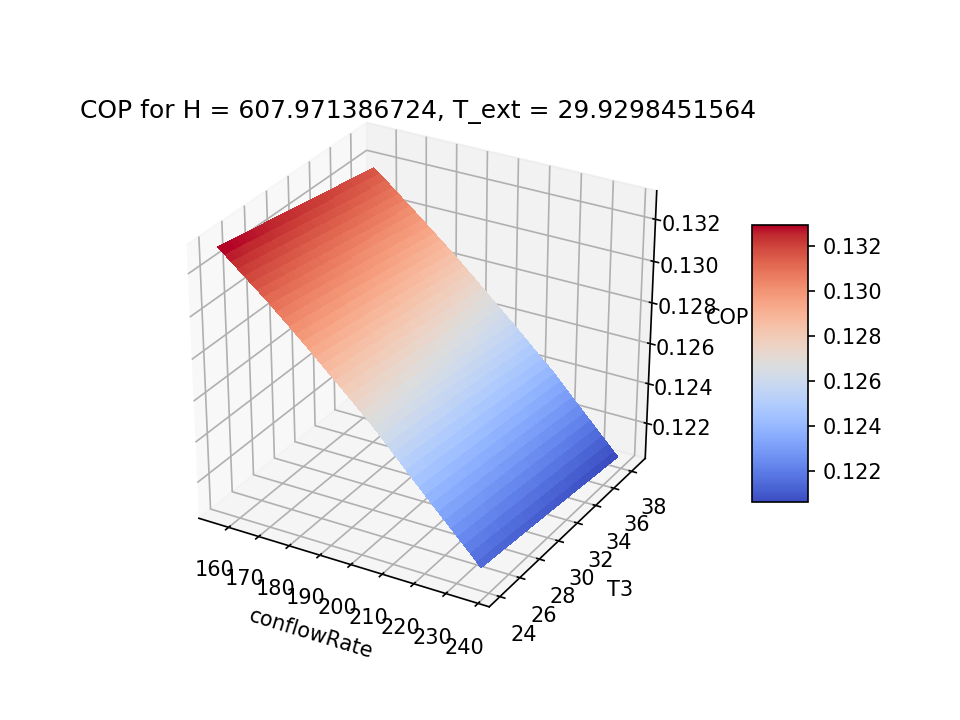

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(F_full, T3_full, COP_T,cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf,shrink=0.5, aspect=5)
ax.set_xlabel('conflowRate')
ax.set_ylabel('T3')
ax.set_zlabel('COP')
ax.set_title('COP for H = '+str(H)+', T_ext = '+str(T_ext))

In [34]:
n=np.argmax(COP_T)
print("Best COP")
print(COP_T.reshape(-1)[n])
print("best F")
best_F=F_full.reshape(-1)[n]
print(best_F)
print("best T3")
print(T3_full.reshape(-1)[n])
best_F_index=np.where(F==best_F)

Best COP
0.133074354164
best F
156.0
best T3
24.0
